# Problem Statement 

-------------------------------------------------------------------------------------

- Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

- Data Description:
 
  The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent   flier program. For each passenger the data include information on their mileage history and on   different ways they accrued or spent miles in the last year. The goal is to try to identify       clusters of passengers that have similar characteristics for the purpose of targeting different   segments for different types of mileage offers

  ID --Unique ID

  Balance--Number of miles eligible for award travel

  Qual_mile--Number of miles counted as qualifying for Topflight status

  cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
  cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
  cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

  1 = under 5,000
  2 = 5,000 - 10,000
  3 = 10,001 - 25,000
  4 = 25,001 - 50,000
  5 = over 50,000

  Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

  Bonus_trans--Number of non-flight bonus transactions in the past 12 months

  Flight_miles_12mo--Number of flight miles in the past 12 months

  Flight_trans_12--Number of flight transactions in the past 12 months

  Days_since_enrolled--Number of days since enrolled in flier program

  Award--whether that person had award flight (free flight) or not


-------------------------------------------------------------------------------------------------


In [1]:
# Importing Necesarry Libraries 

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

In [2]:
df = pd.read_excel(r"C:\Users\sandi\Documents\GitHub\Assignments\Assignment_07_Clustering\Dataset\EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

# Descriptive Statistics 

In [4]:
df = df.drop(['ID#'], axis=1)
df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 11 columns]

In [5]:
df.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll       Award?  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [6]:
df.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [9]:
df.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64

# visualization 

In [10]:
def boxplots1(df):
    fig, ax = plt.subplots(2,3)
    sns.boxplot(df.iloc[:,0], ax = ax[0,0])
    sns.boxplot(df.iloc[:,1], ax = ax[0,1])
    sns.boxplot(df.iloc[:,2], ax = ax[0,2])
    sns.boxplot(df.iloc[:,3], ax = ax[1,0])
    sns.boxplot(df.iloc[:,4], ax = ax[1,1])
    sns.boxplot(df.iloc[:,5], ax = ax[1,2])
  
    plt.tight_layout()

In [11]:
def boxplots6(df):
    fig, ax = plt.subplots(2,3) 
    
    sns.boxplot(df.iloc[:,6], ax = ax[0,0])
    sns.boxplot(df.iloc[:,7], ax = ax[0,1])
    sns.boxplot(df.iloc[:,8], ax = ax[0,2])
    sns.boxplot(df.iloc[:,9], ax = ax[1,0])
    sns.boxplot(df.iloc[:,10], ax = ax[1,1])
    #sns.boxplot(df.iloc[:,11], ax = ax[1,2])
    
    plt.tight_layout()

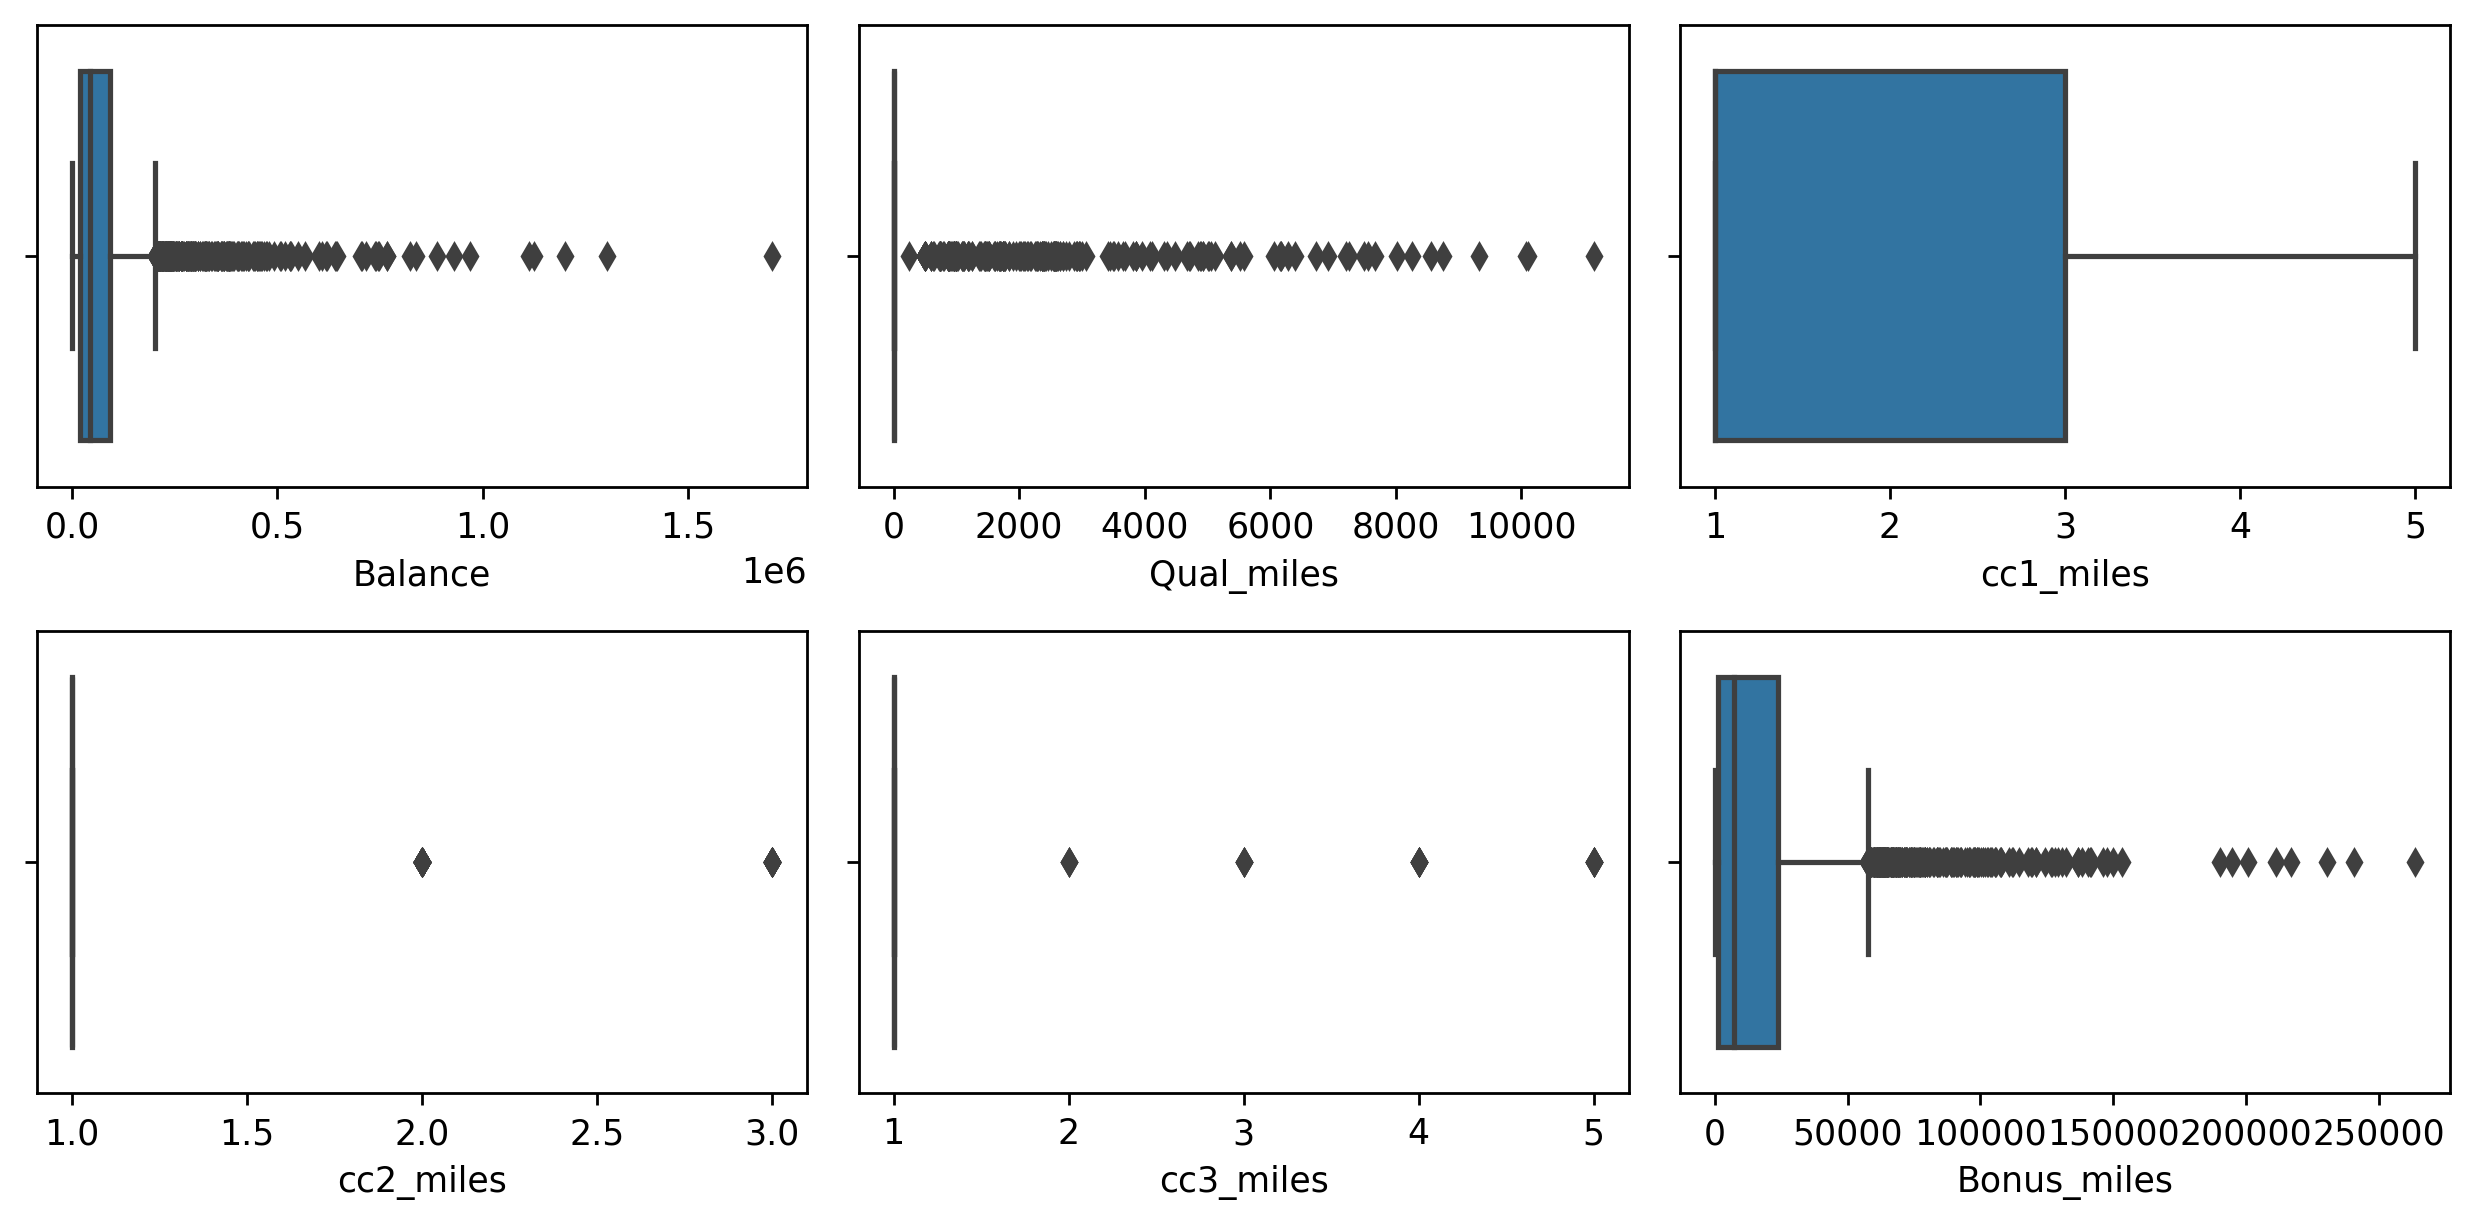

In [12]:
boxplots1(df)

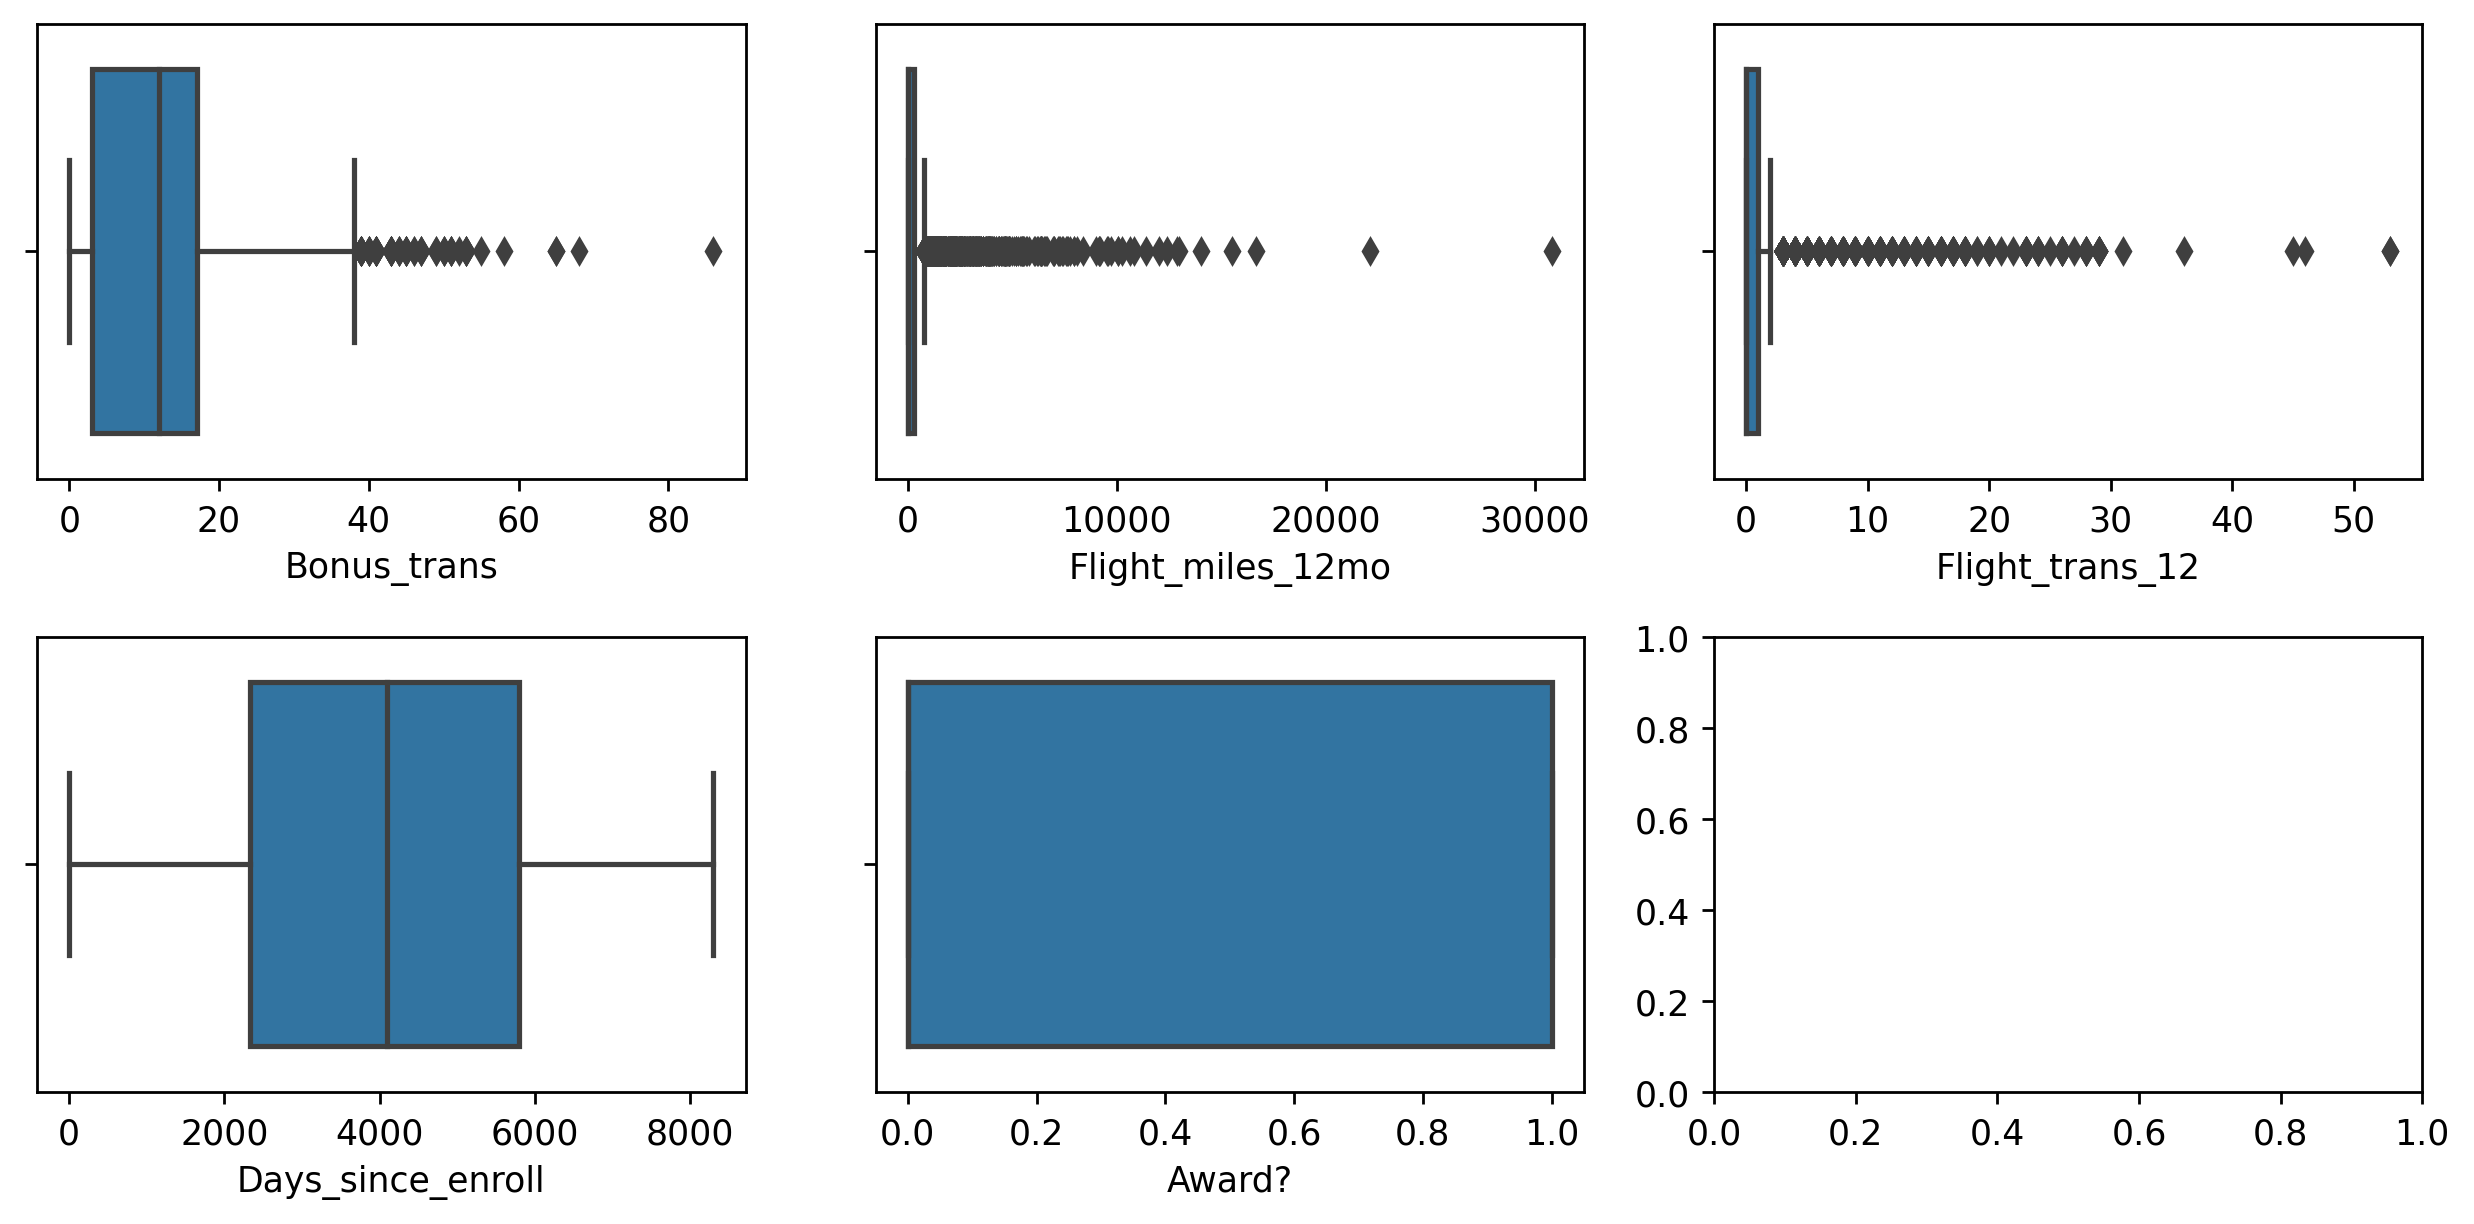

In [14]:
boxplots6(df)

In [15]:
def histplot1(df):
    fig, ax = plt.subplots(2,3)
    sns.histplot(df.iloc[:,0], ax = ax[0,0])
    sns.histplot(df.iloc[:,1], ax = ax[0,1])
    sns.histplot(df.iloc[:,2], ax = ax[0,2])
    sns.histplot(df.iloc[:,3], ax = ax[1,0])
    sns.histplot(df.iloc[:,4], ax = ax[1,1])
    sns.histplot(df.iloc[:,5], ax = ax[1,2])
  
    plt.tight_layout()

In [16]:
def histplot6(df):
    fig, ax = plt.subplots(2,3) 
    
    sns.histplot(df.iloc[:,6], ax = ax[0,0])
    sns.histplot(df.iloc[:,7], ax = ax[0,1])
    sns.histplot(df.iloc[:,8], ax = ax[0,2])
    sns.histplot(df.iloc[:,9], ax = ax[1,0])
    sns.histplot(df.iloc[:,10], ax = ax[1,1])
    #sns.histplot(df.iloc[:,11], ax = ax[1,2])
    
    plt.tight_layout()

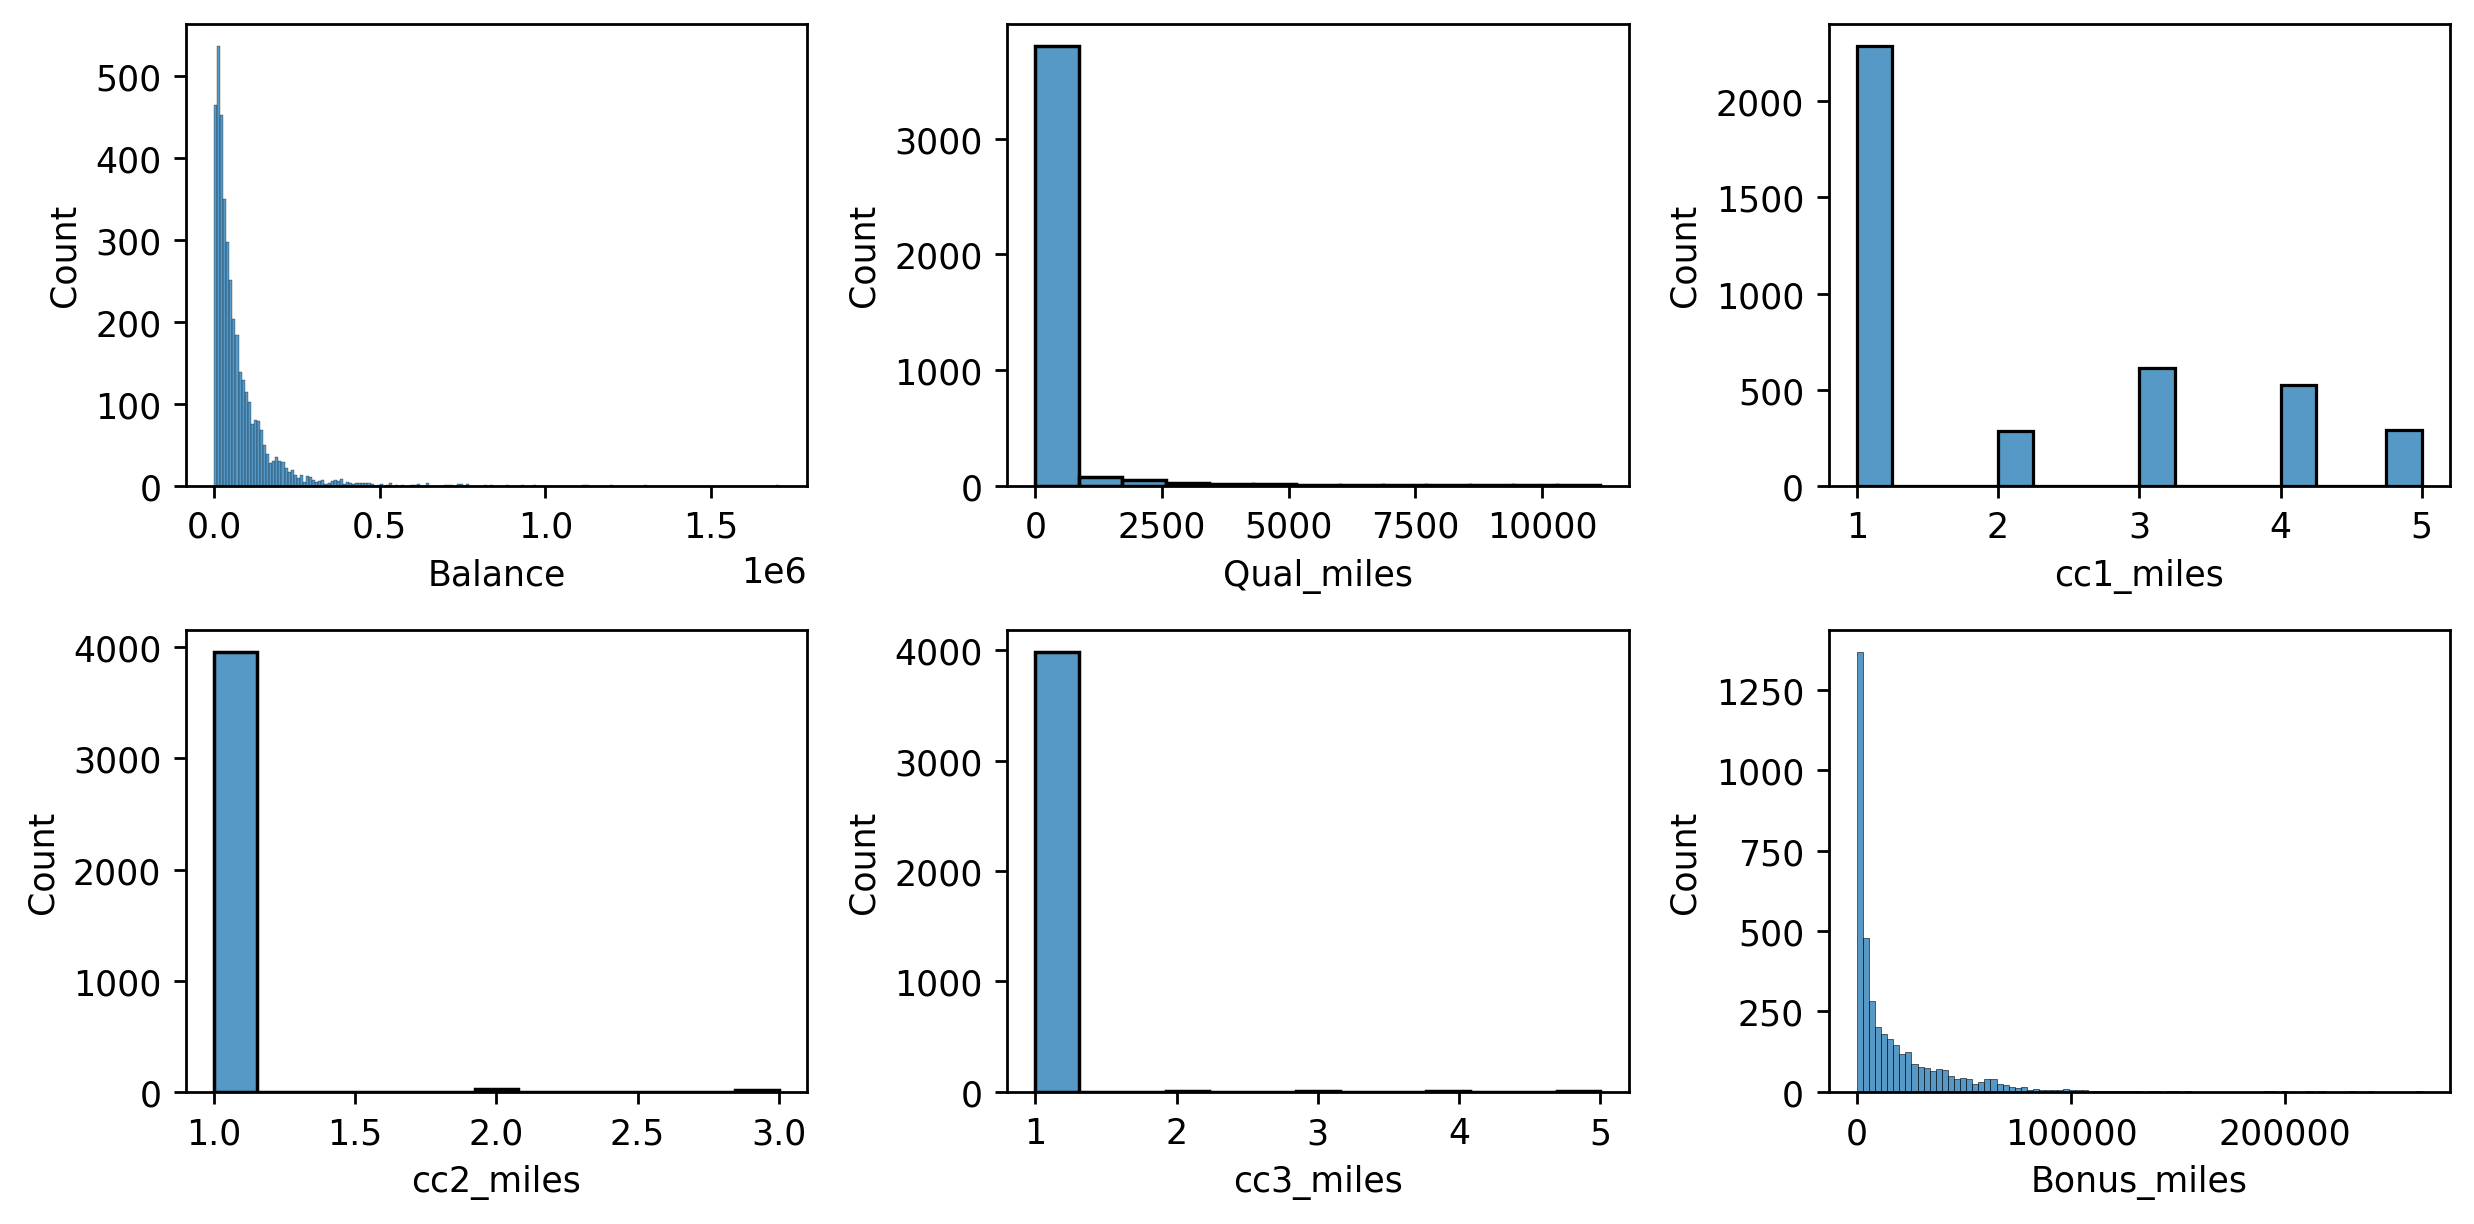

In [17]:
histplot1(df)

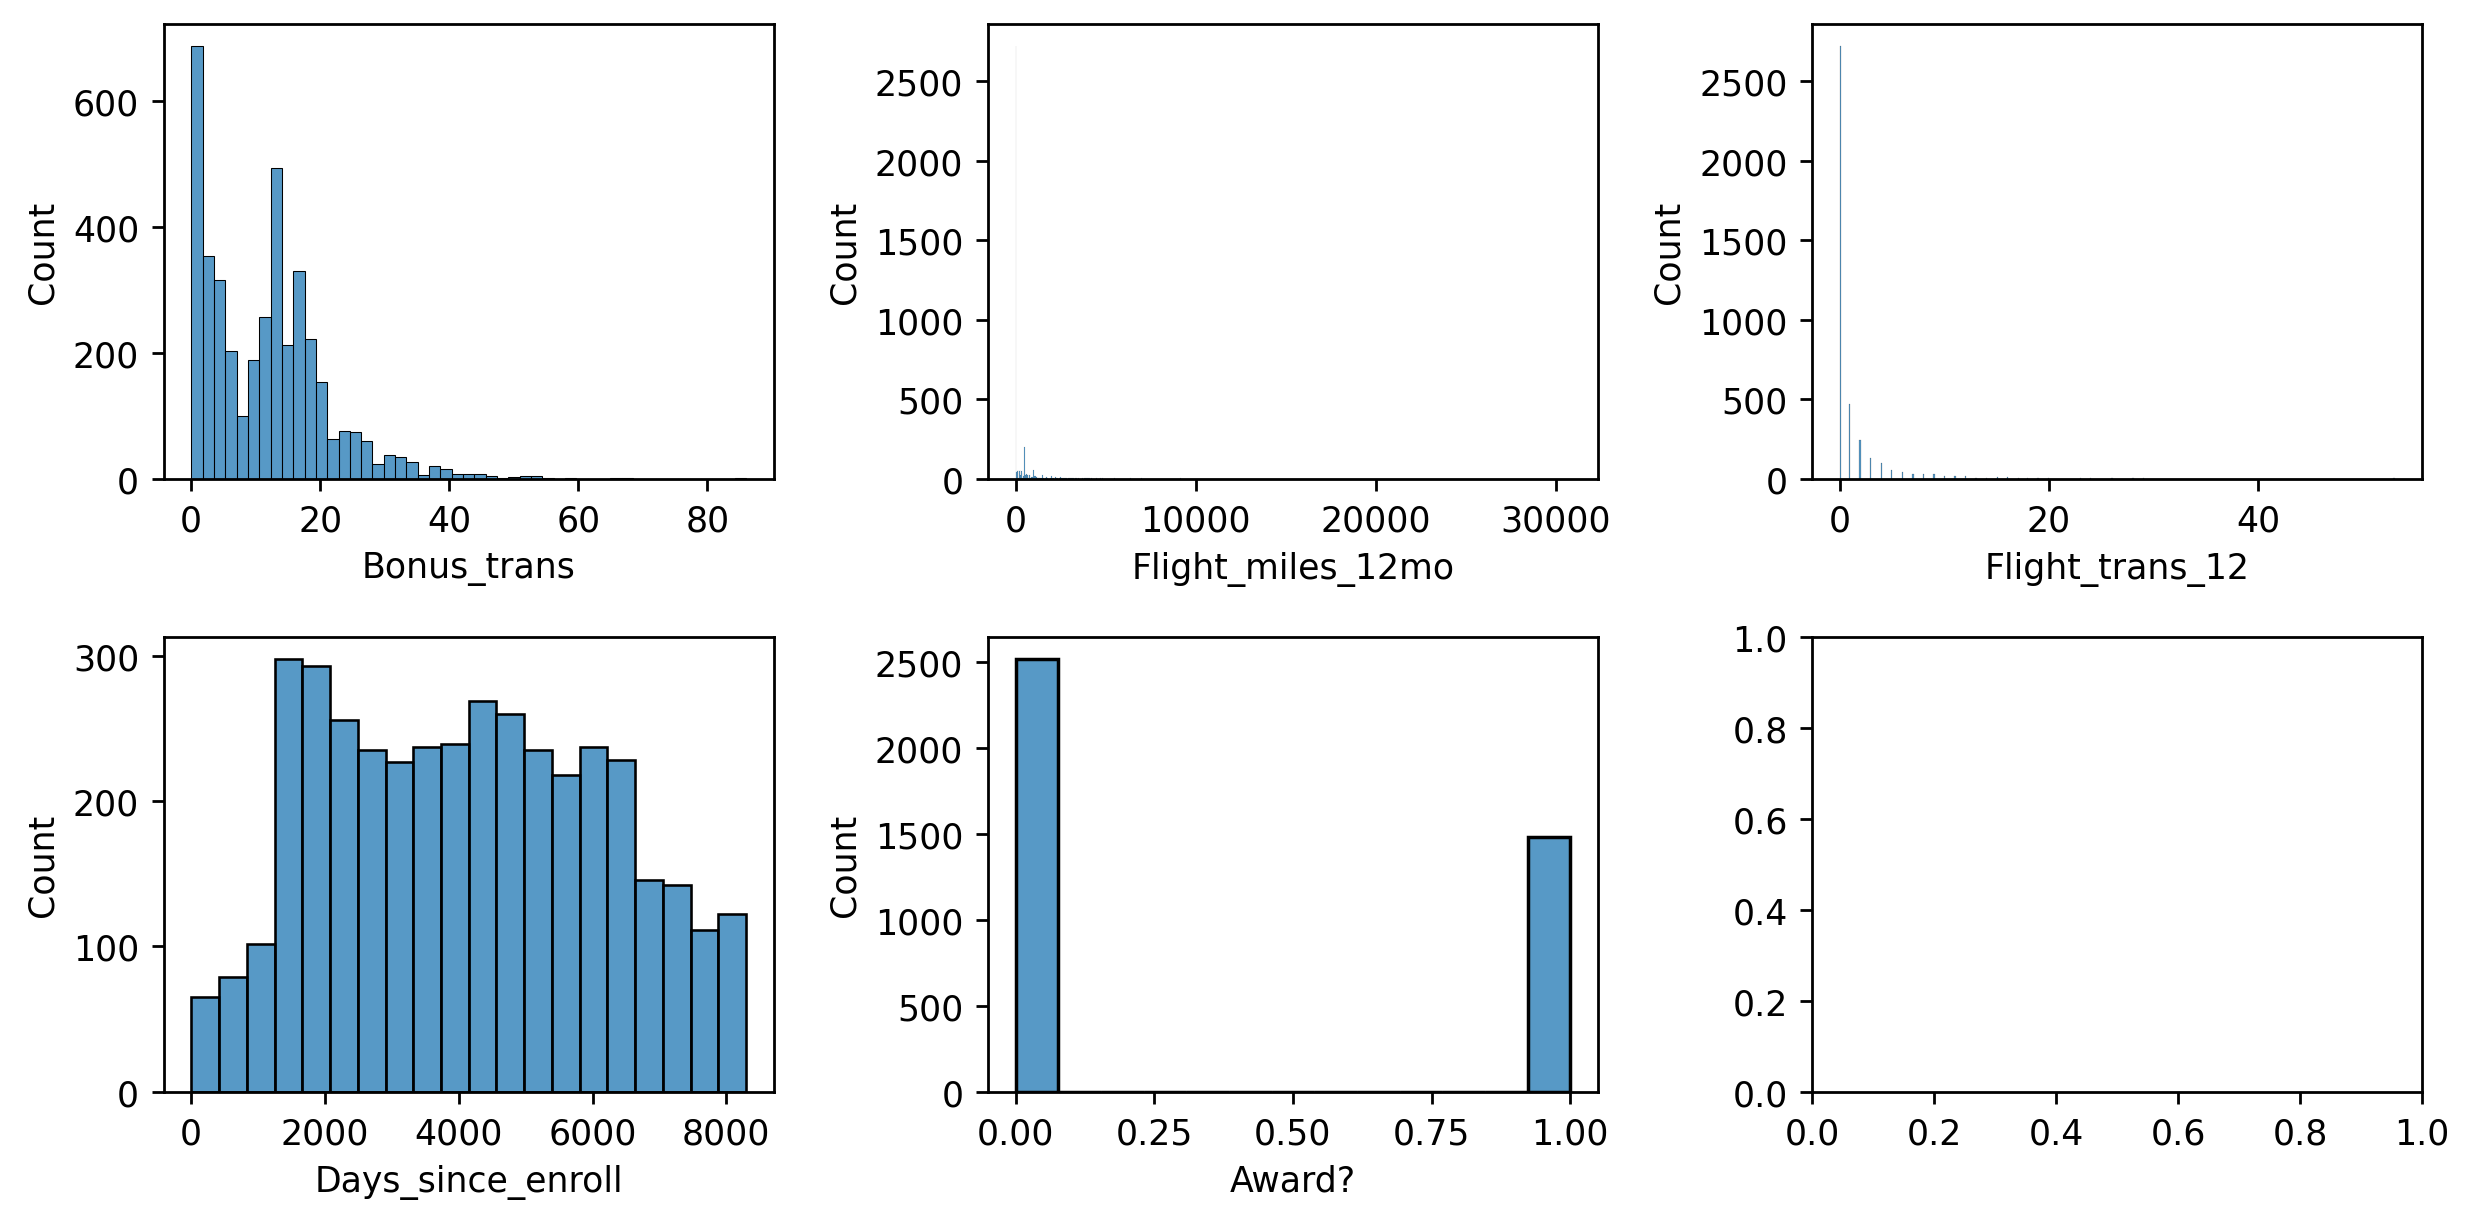

In [23]:
histplot6(df)

# Correlation analysis

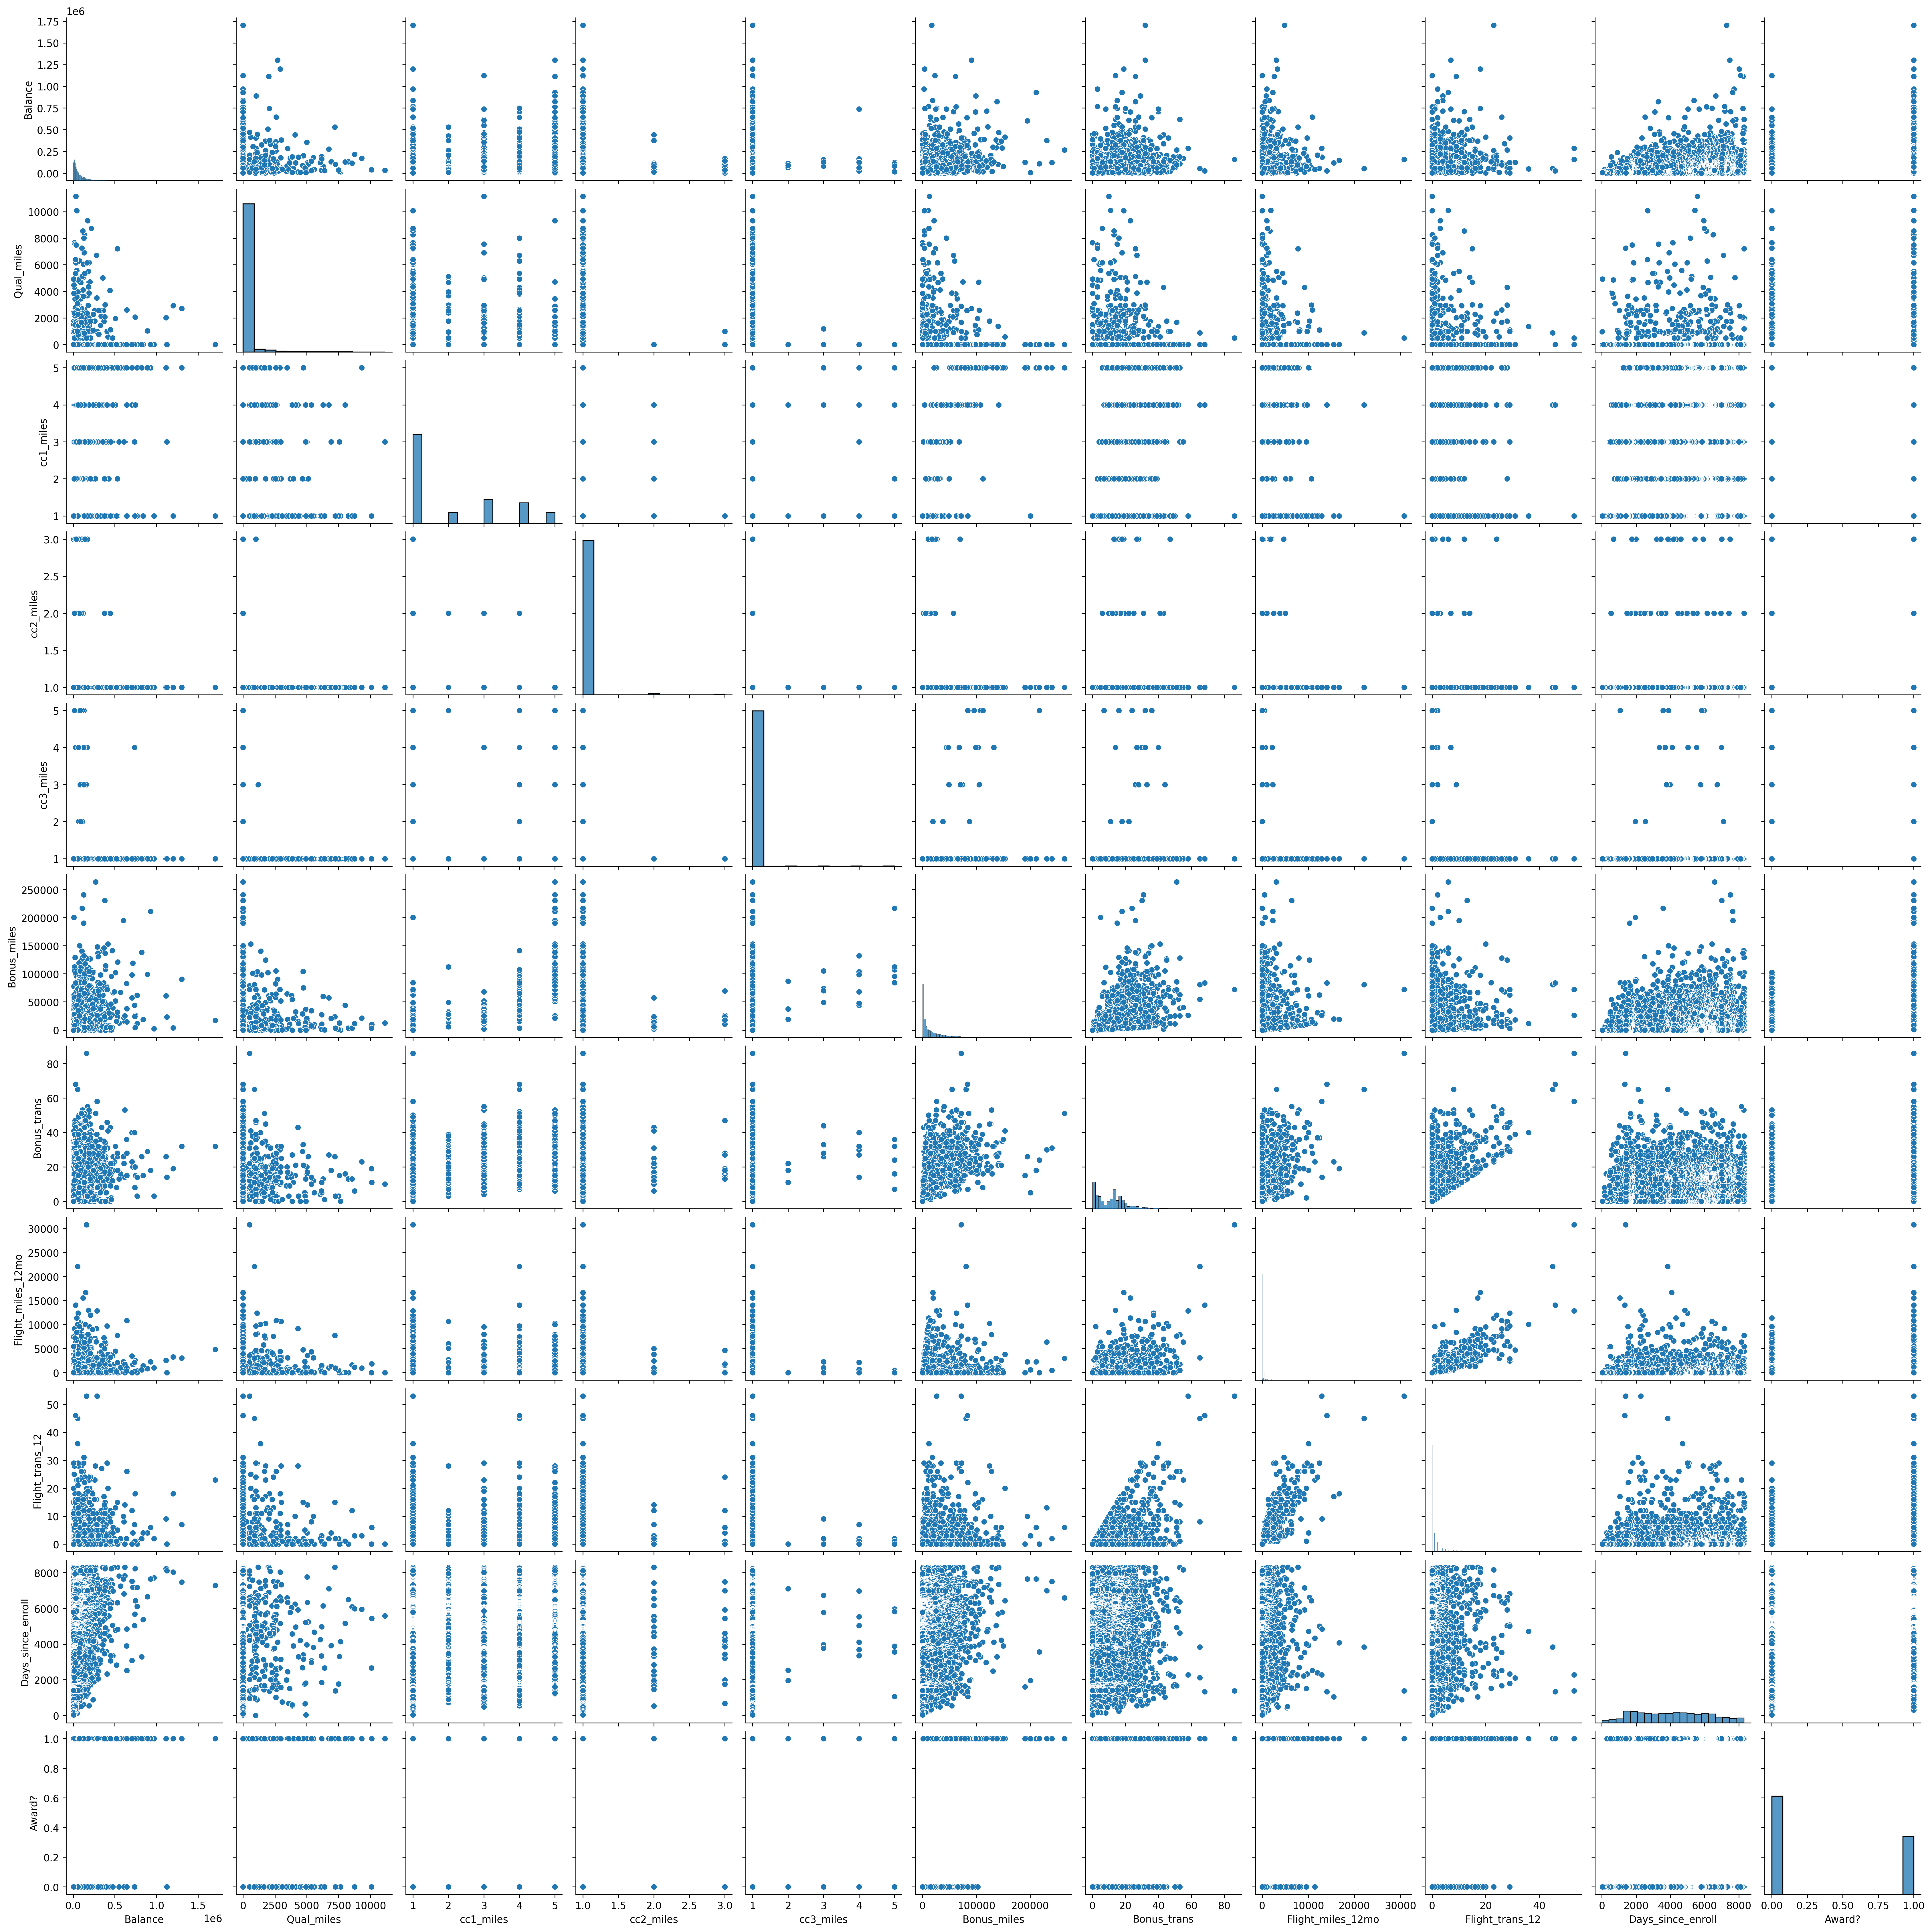

In [24]:
sns.pairplot(df)

<AxesSubplot:>

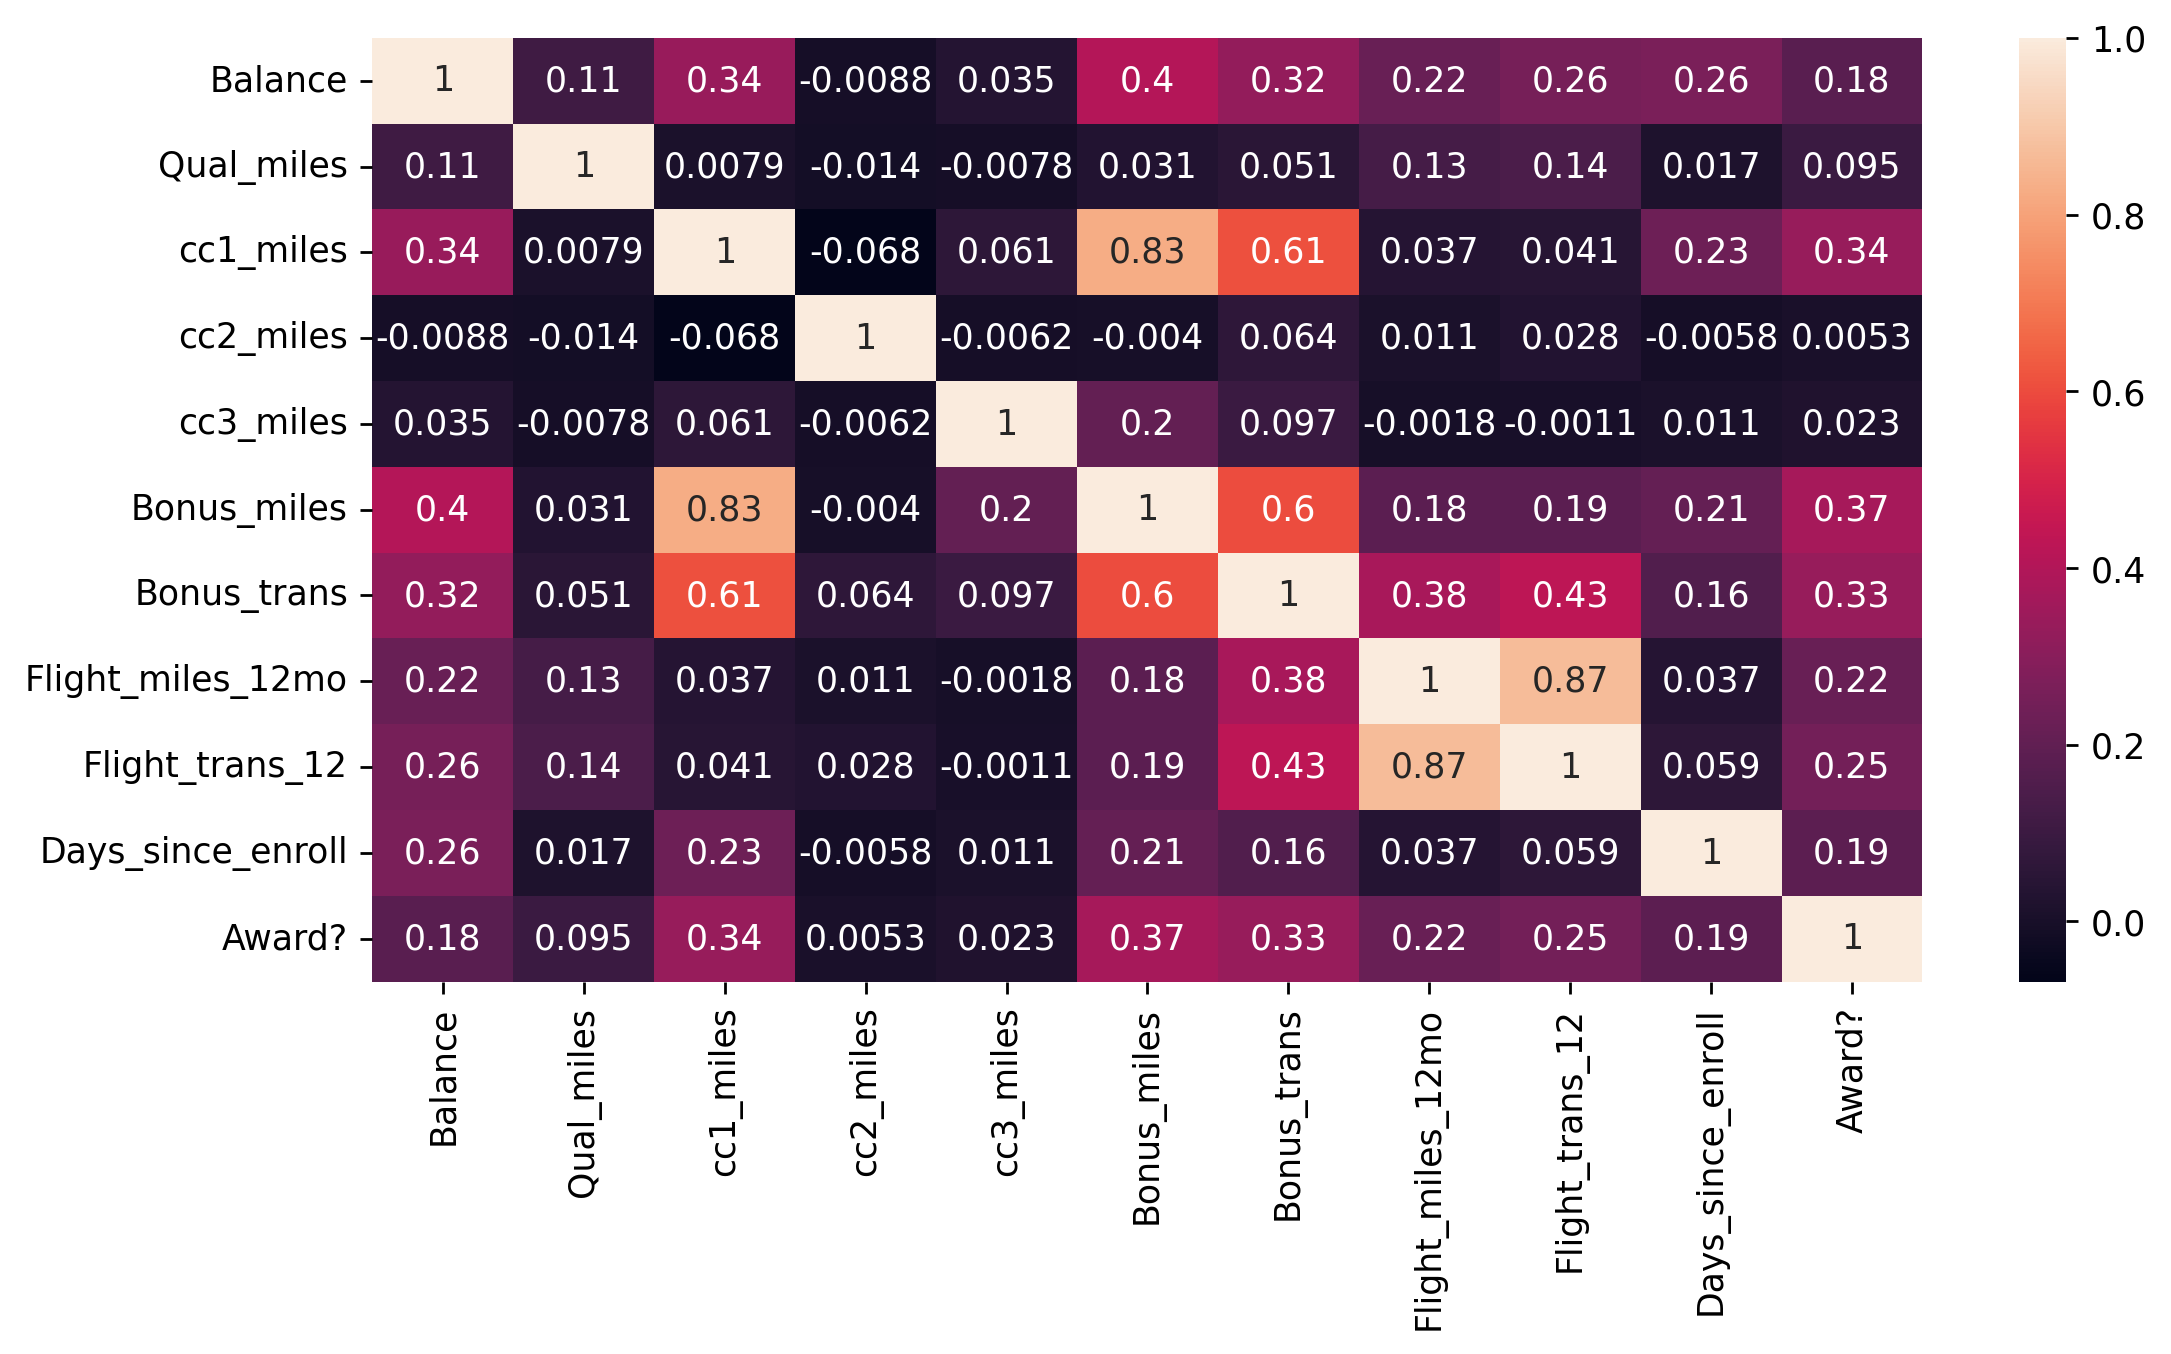

In [20]:
sns.heatmap(df.corr(),annot=True)

# Performing Feature Scaling 

In [21]:
x = df.drop(columns=['cc1_miles','cc2_miles','cc3_miles','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?'])

In [22]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

scaled_x.head()

Balance  Qual_miles  Bonus_miles  Bonus_trans
0 -0.451141   -0.186299    -0.702786    -1.104065
1 -0.539457   -0.186299    -0.701088    -0.999926
2 -0.320031   -0.186299    -0.539253    -0.791649
3 -0.583799   -0.186299    -0.689286    -1.104065
4  0.239678   -0.186299     1.083121     1.499394

# HC Clustering 

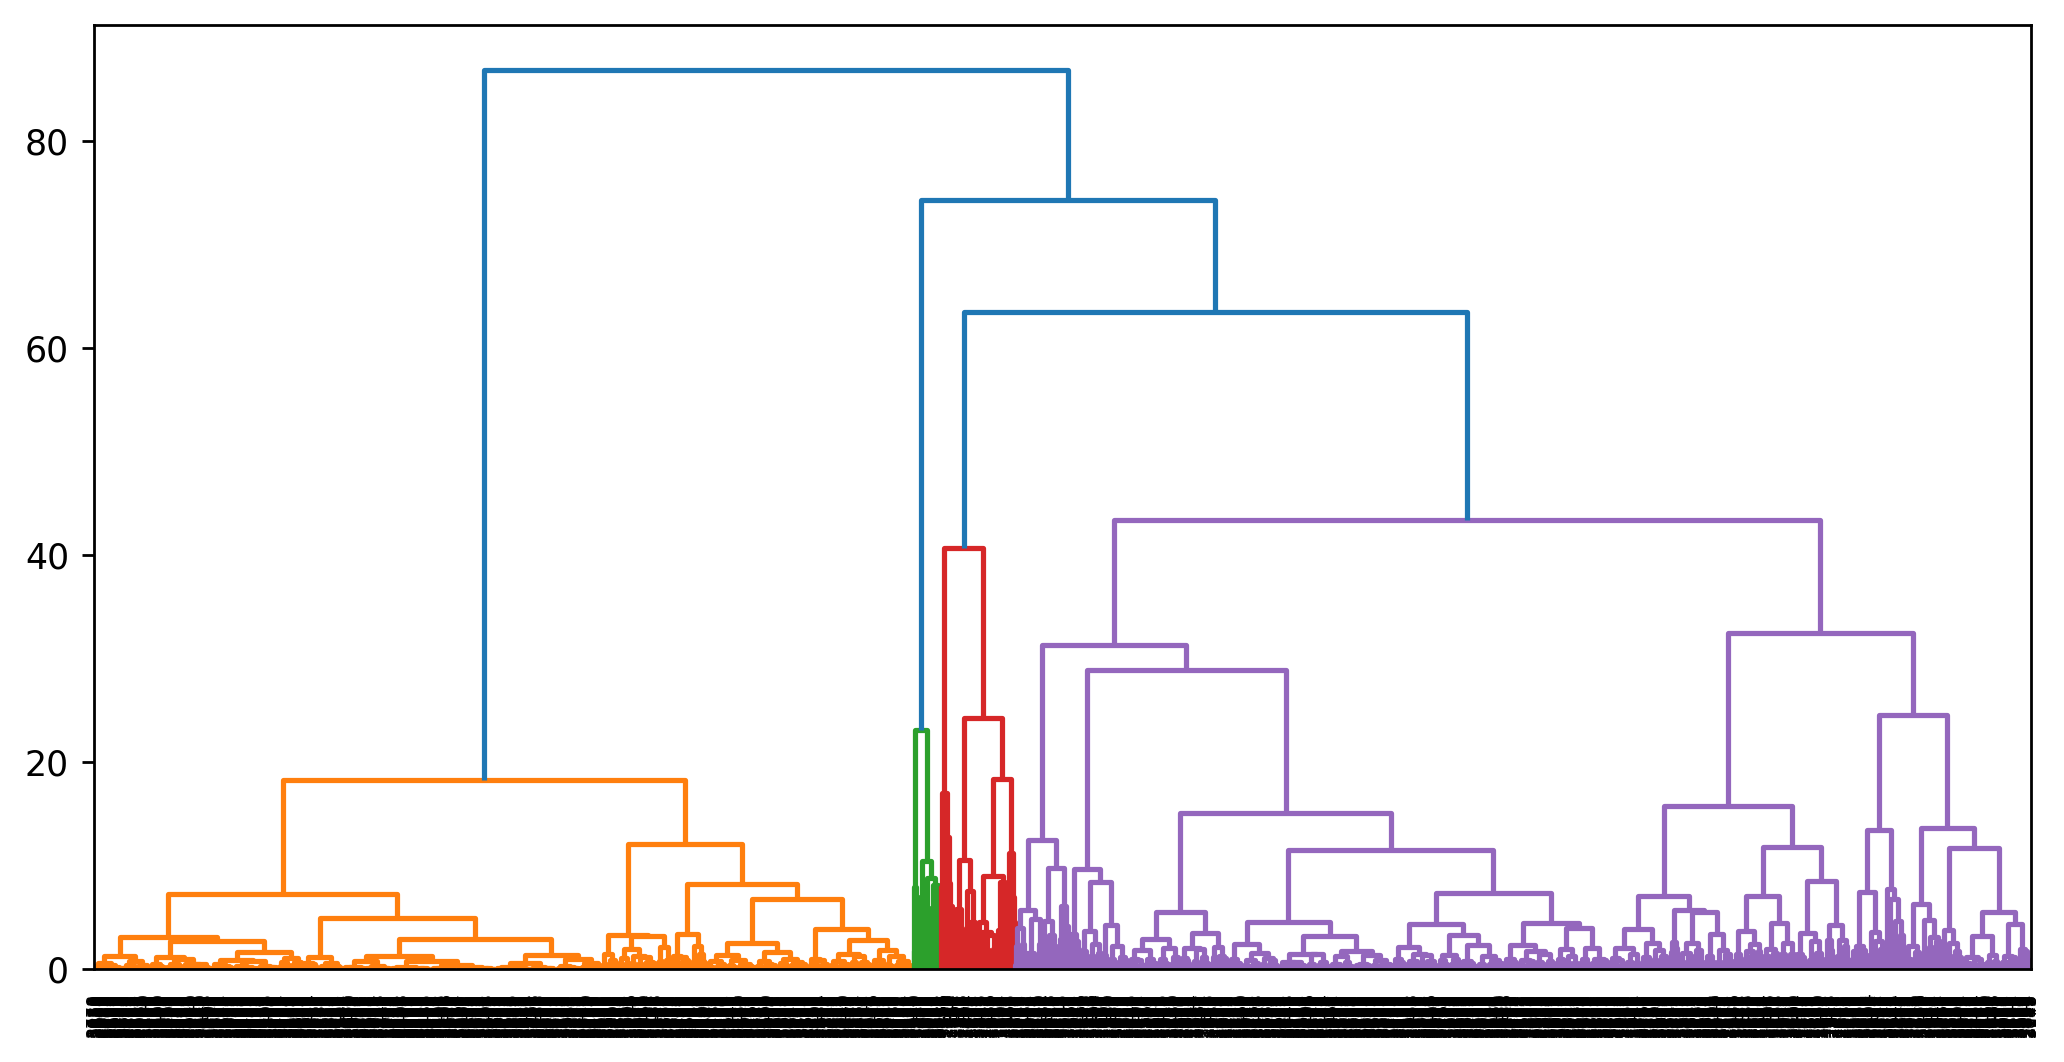

In [64]:
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

lk_complete = hierarchy.linkage(scaled_x,method='ward')
dendrogram_complete = hierarchy.dendrogram(lk_complete)
plt.axhline(y = 100 , c = 'violet', linestyle = '--')

In [65]:
hc = AgglomerativeClustering(n_clusters = 2)

y_hc = hc.fit_predict(scaled_x)

y_hc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [66]:
df['Hc_cluster'] = y_hc

df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   k_means_cluster  Db_cluster  Hc_cluster  
0                0           0           1  
1                0           0           1  
2                0           0           1  
3                0           0           1  
4                3           0           0

# K_Means Clustering 

In [30]:
from sklearn.cluster import KMeans

In [31]:
km = KMeans()

cluster=km.fit_predict(scaled_x)

cluster

array([0, 0, 0, ..., 7, 0, 0])

In [34]:
wcss = []

for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [35]:
wcss

[42936930965473.11,
 20799569834500.926,
 11765610891909.434,
 7526207353507.5,
 5701615587279.006,
 4518456416895.666,
 3674319470443.297,
 3278756938130.5195,
 2878777609903.287,
 2605899055373.3574,
 2359390007849.166,
 2150253227920.6284,
 1995243109539.3171,
 1806860653019.0972,
 1671483492789.4604,
 1555795193692.569,
 1455116724399.6714,
 1362139970319.4524,
 1281950967059.1296,
 1185668331739.5146,
 1128598202652.9304,
 1069422784951.677,
 1016354853971.1735,
 973683711058.6589]

Text(0, 0.5, 'WCSS')

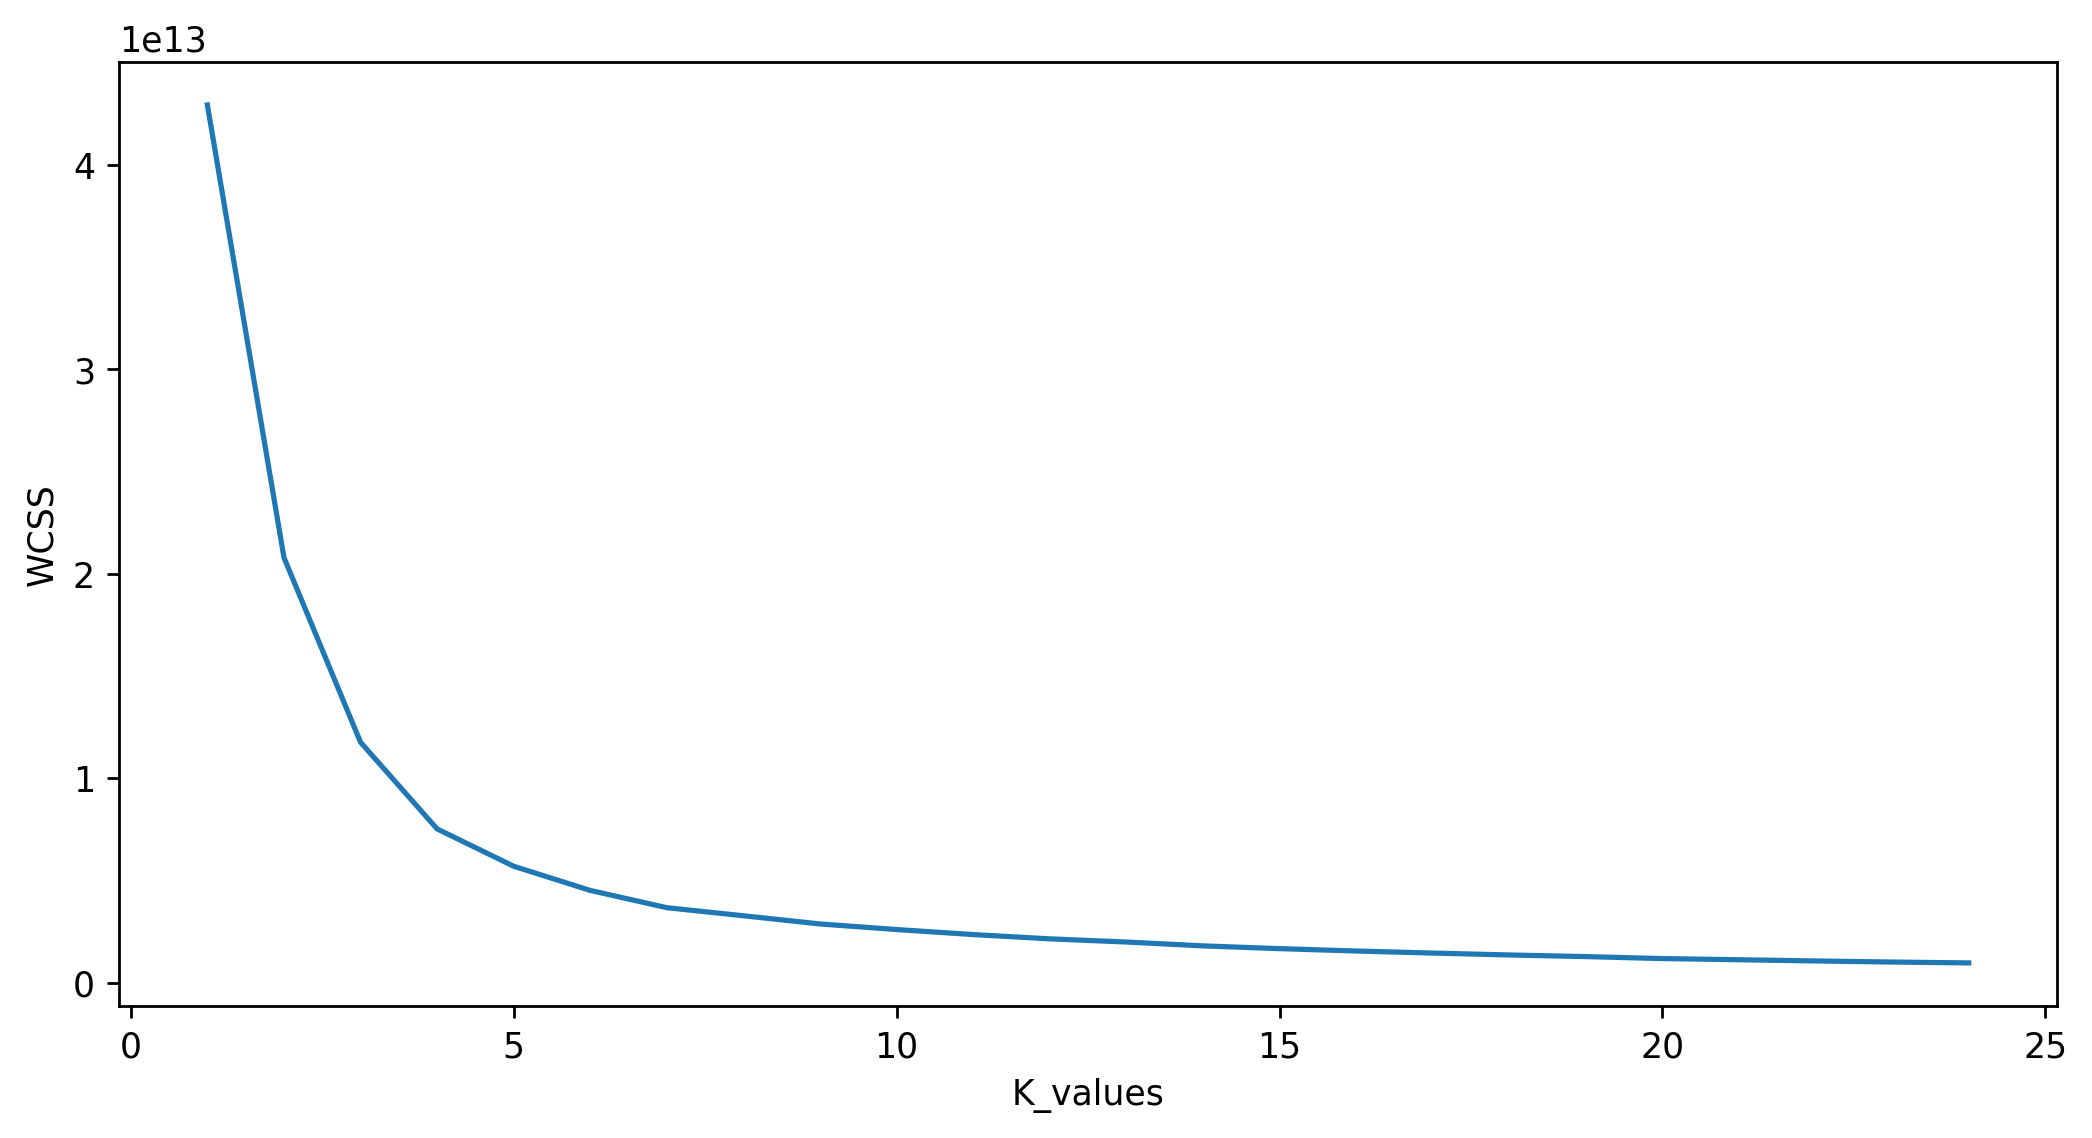

In [36]:
plt.plot(range(1,25),wcss)
plt.xlabel('K_values')
plt.ylabel('WCSS')

In [39]:
# Model building with 4 

km = KMeans(n_clusters=4)

k_means_cluster = km.fit_predict(x)

k_means_cluster


array([0, 0, 0, ..., 0, 0, 0])

In [40]:
km.cluster_centers_

array([[3.07640612e+04, 1.02134478e+02, 1.00585576e+04, 9.30579399e+00],
       [3.23009849e+05, 3.37248649e+02, 4.36441189e+04, 1.85837838e+01],
       [8.42320231e+05, 5.12692308e+02, 5.77971923e+04, 2.27307692e+01],
       [1.27679683e+05, 2.16759073e+02, 3.11105081e+04, 1.64798387e+01]])

In [41]:
scaled_x.columns

Index(['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans'], dtype='object')

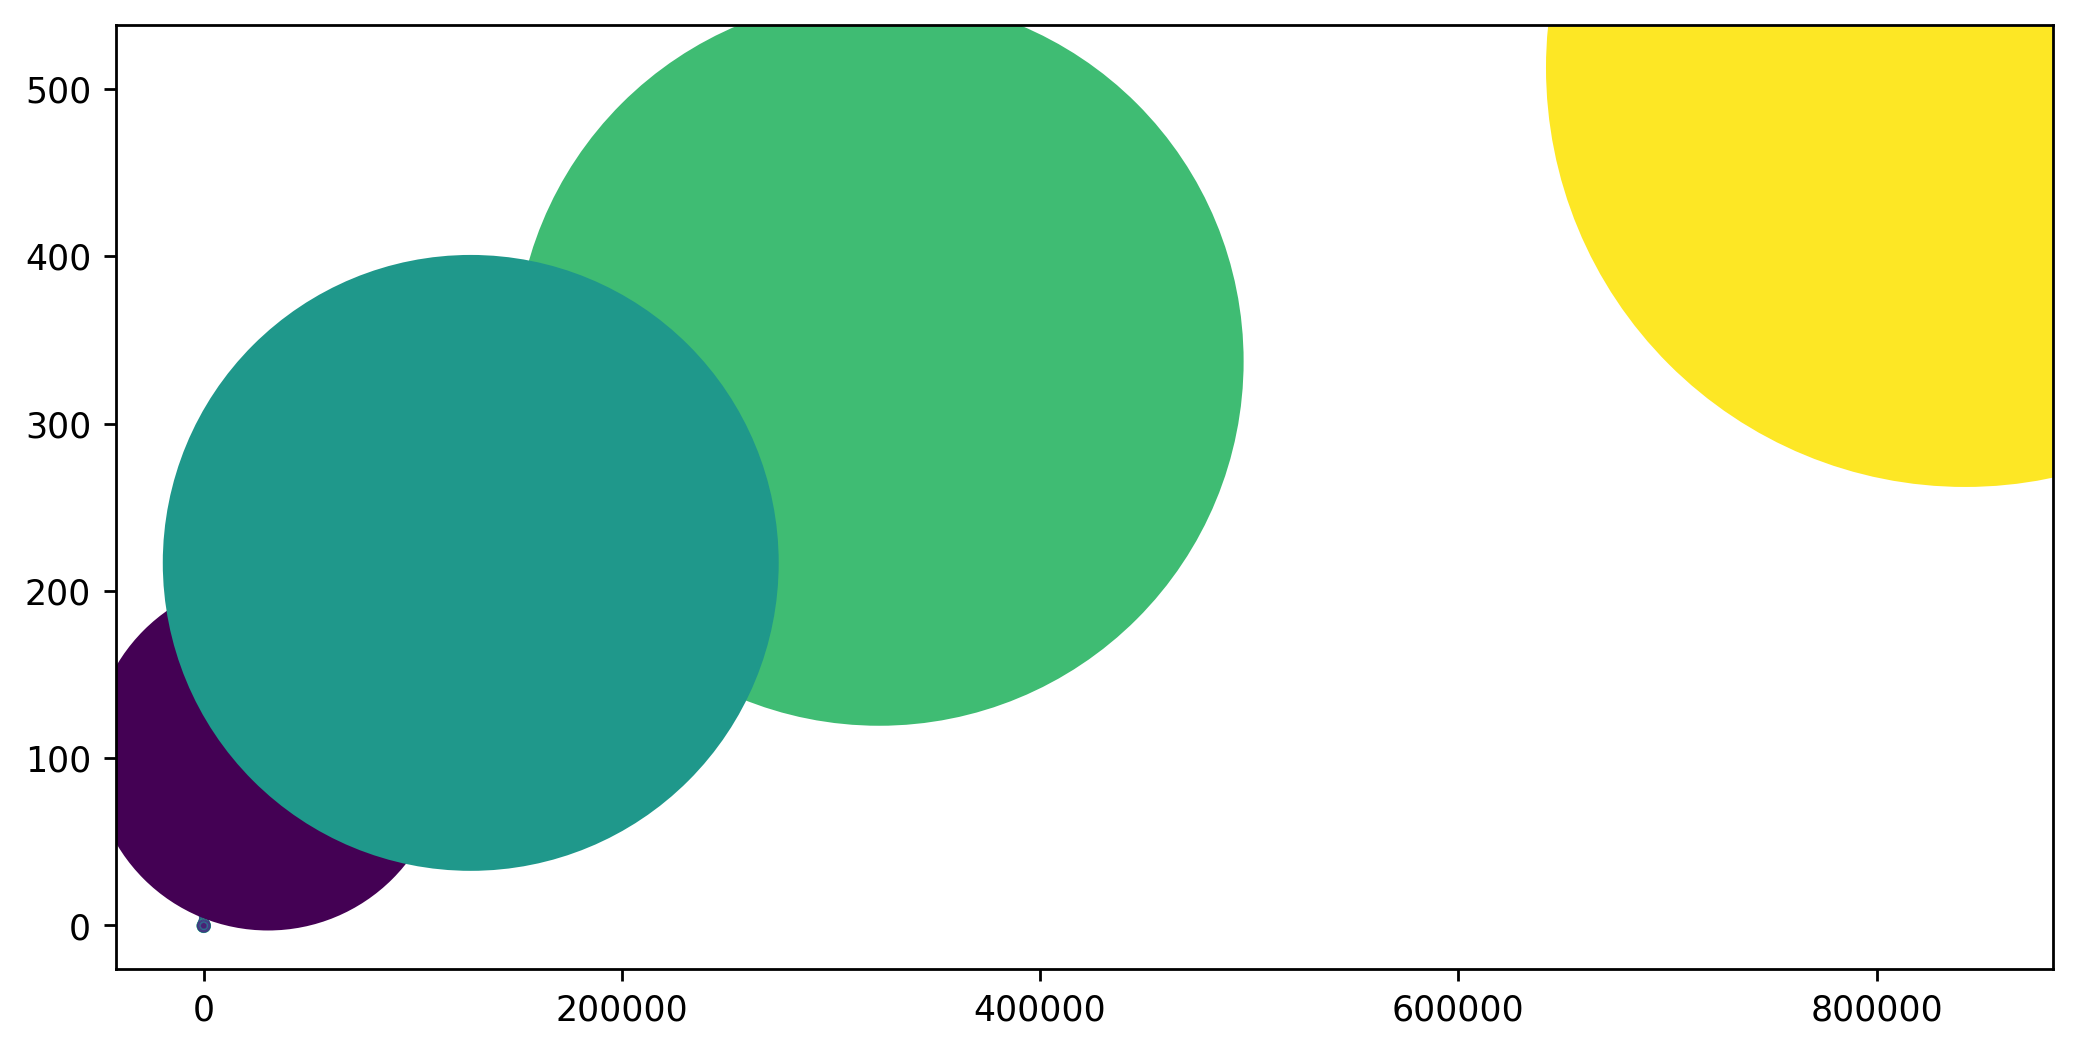

In [53]:
plt.scatter(scaled_x['Balance'],scaled_x['Qual_miles'],scaled_x['Bonus_miles'],scaled_x['Bonus_trans'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],km.cluster_centers_[:,3])

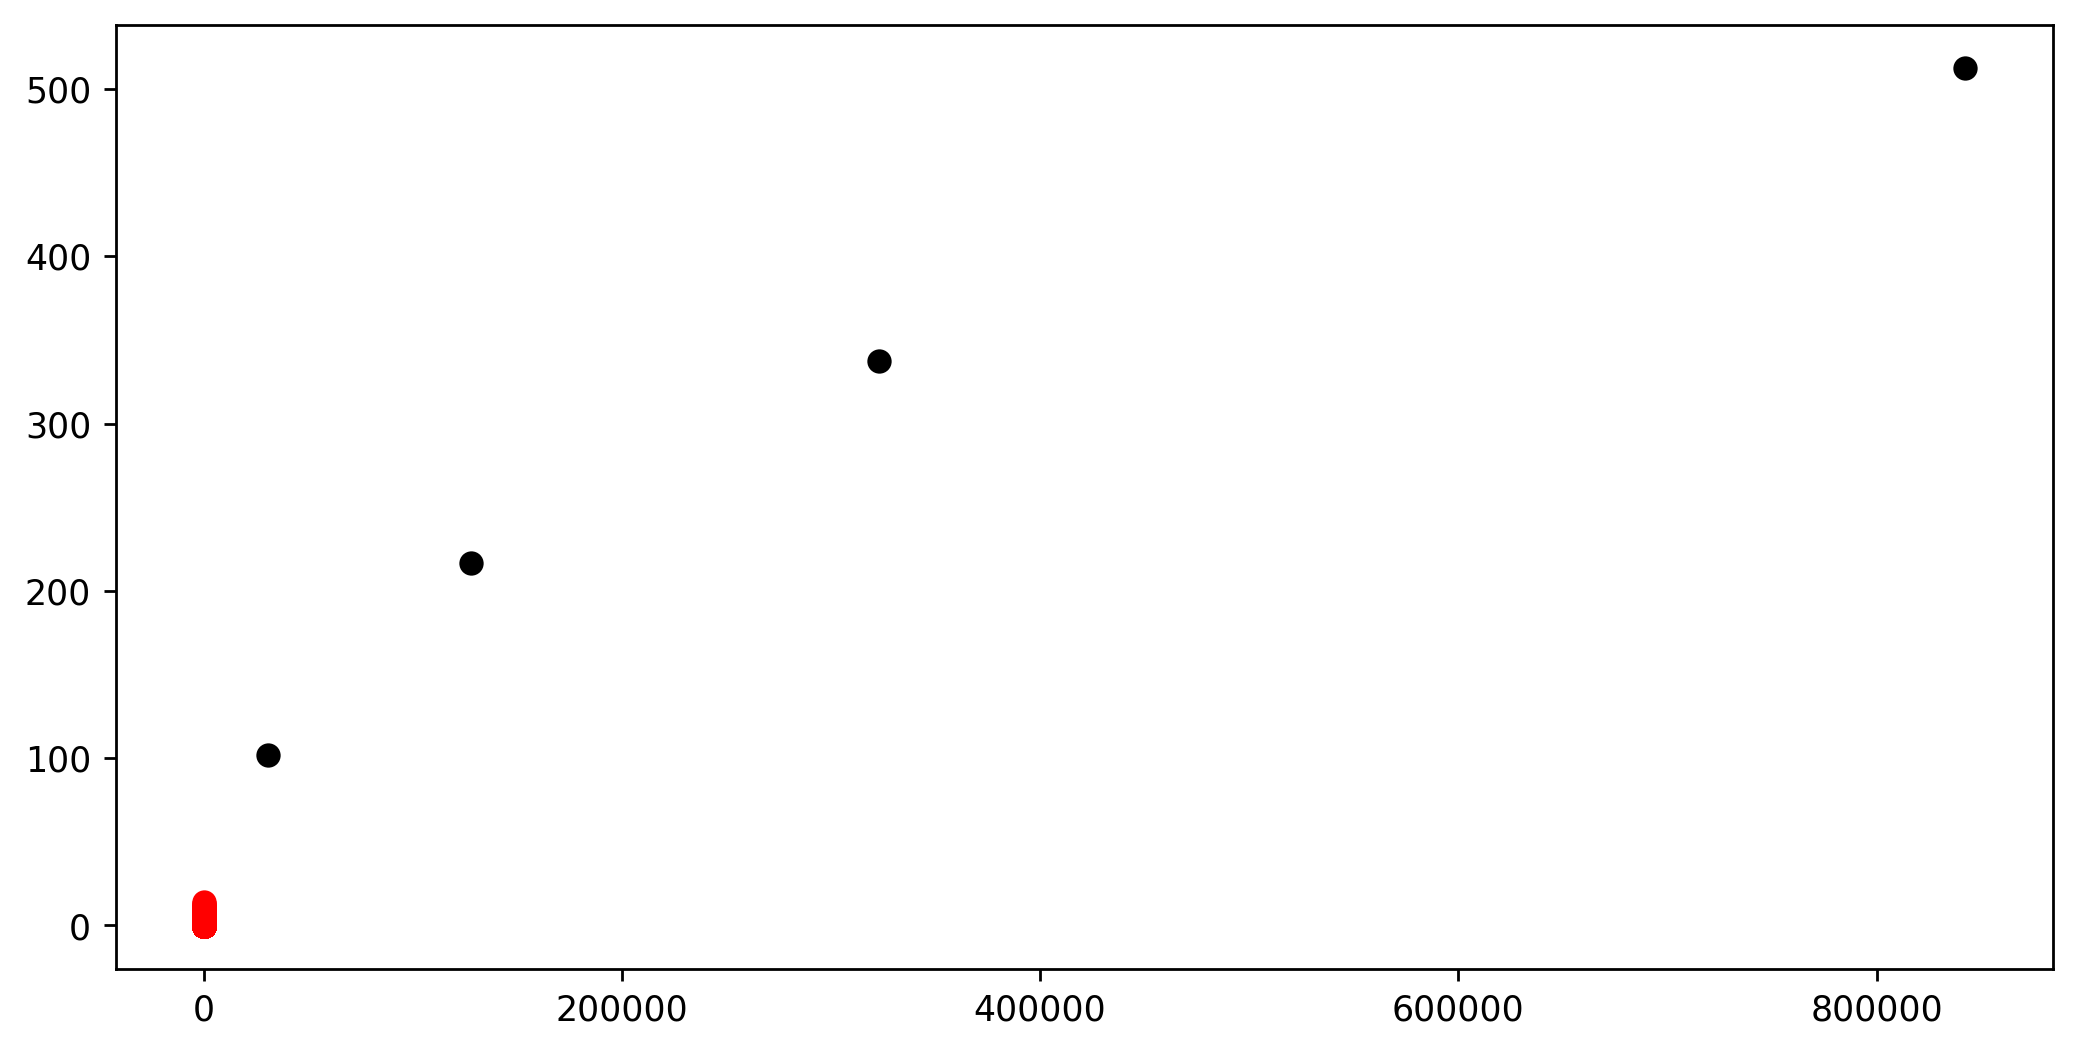

In [50]:
plt.scatter(scaled_x['Balance'],scaled_x['Qual_miles'],c='r')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black')

In [55]:
df['k_means_cluster'] = k_means_cluster

df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  k_means_cluster  
0          0                0  
1          0                0  
2          0                0  
3          0                0  
4          1                3  
...      ...              ...  
3994       1                0  
3995       1                0  
3996       1                0  
3997       0                0  
3998       0                0  

[3999 rows x 12 columns]

# DBSCAN

In [56]:
from sklearn.neighbors import NearestNeighbors
# neigh = NearestNeighbors(n_neighbors=5)
# nbrs = neigh.fit(X)
# distances, indices = nbrs.kneighbors(X)

neigh = NearestNeighbors(n_neighbors = 5).fit(scaled_x)
dist, ind = neigh.kneighbors(scaled_x)

In [57]:
pd.DataFrame(dist)

0         1         2         3         4
0     0.0  0.006286  0.010681  0.011980  0.015996
1     0.0  0.001601  0.010906  0.021892  0.024719
2     0.0  0.024761  0.026469  0.039228  0.060260
3     0.0  0.000069  0.002799  0.007880  0.008867
4     0.0  0.143246  0.208703  0.321853  0.349019
...   ...       ...       ...       ...       ...
3994  0.0  0.103806  0.104806  0.106501  0.109482
3995  0.0  0.037521  0.066849  0.067527  0.081344
3996  0.0  0.131491  0.135685  0.154042  0.199822
3997  0.0  0.019194  0.019313  0.022605  0.024404
3998  0.0  0.000328  0.000486  0.000655  0.001121

[3999 rows x 5 columns]

Text(0.5, 1.0, 'K-dist Plot')

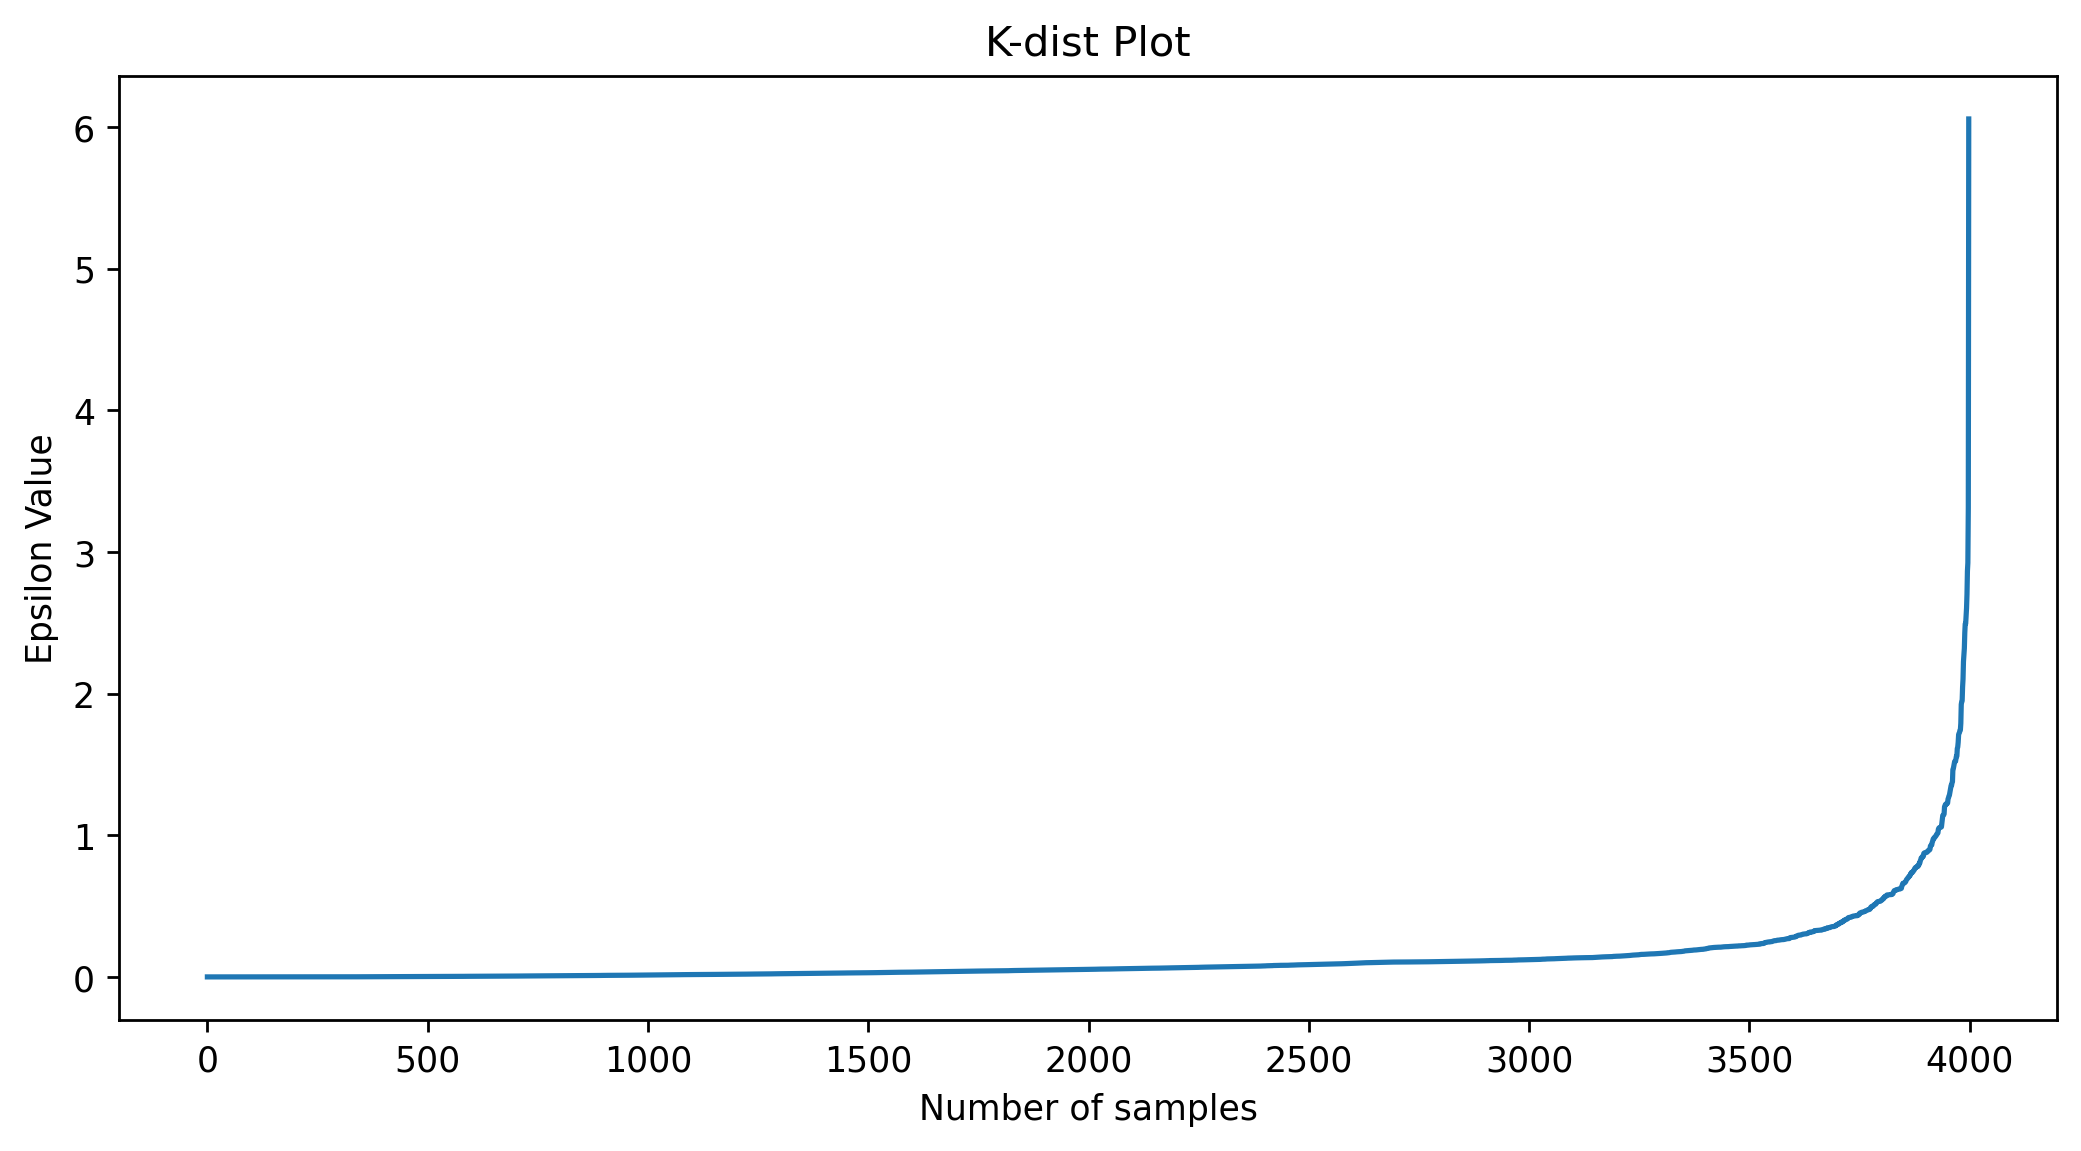

In [58]:
distance = np.sort(dist[:,1], axis = 0)

plt.plot(distance)
plt.xlabel('Number of samples')
plt.ylabel('Epsilon Value')
plt.title('K-dist Plot')

In [61]:
#  model Preparing for DBSCAN 

from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.9, min_samples = 8)
y_db = db.fit_predict(scaled_x)

y_db

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
df['Db_cluster'] = y_db

df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    28143           0          1          1          1          174   
1    19244           0          1          1          1          215   
2    41354           0          1          1          1         4123   
3    14776           0          1          1          1          500   
4    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  \
0            1                  0                0               7000       0   
1            2                  0                0               6968       0   
2            4                  0                0               7034       0   
3            1                  0                0               6952       0   
4           26               2077                4               6935       1   

   k_means_cluster  Db_cluster  
0                0           0  
1                0           0  
2                0           0  
3                0           0  
4                3           0